# Do we focus our efforts on mobile app or website development? 

## Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data

In [3]:
data = pd.read_csv('Ecommerce Customers')

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

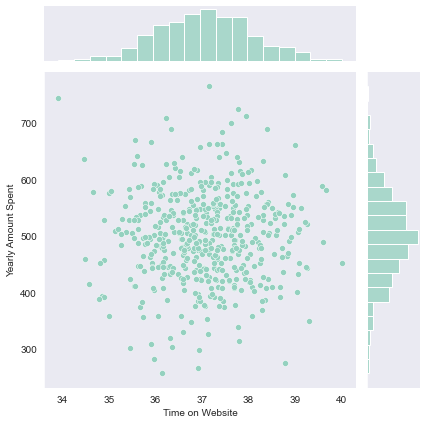

In [13]:
# Time on Website vs Yearly Amount Spent
sns.set_palette("GnBu_d")
sns.set_style('dark')
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = data);

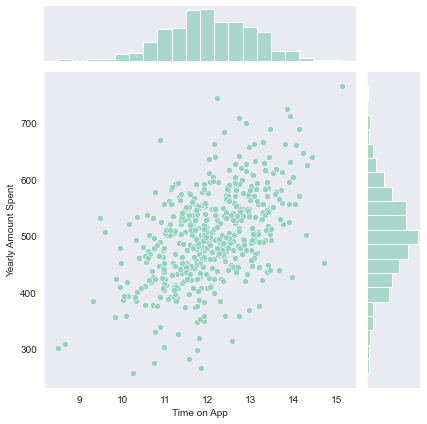

In [14]:
# Time on App vs Yearly Amount Spent
sns.set_palette("GnBu_d")
sns.set_style('dark')
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = data);

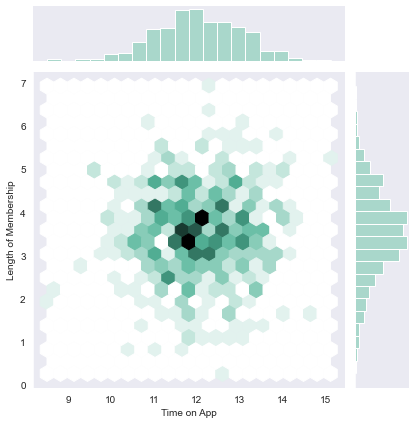

In [18]:
sns.set_palette("GnBu_d")
sns.set_style('dark')
sns.jointplot(x = 'Time on App', y = 'Length of Membership', kind = 'hex', data = data);

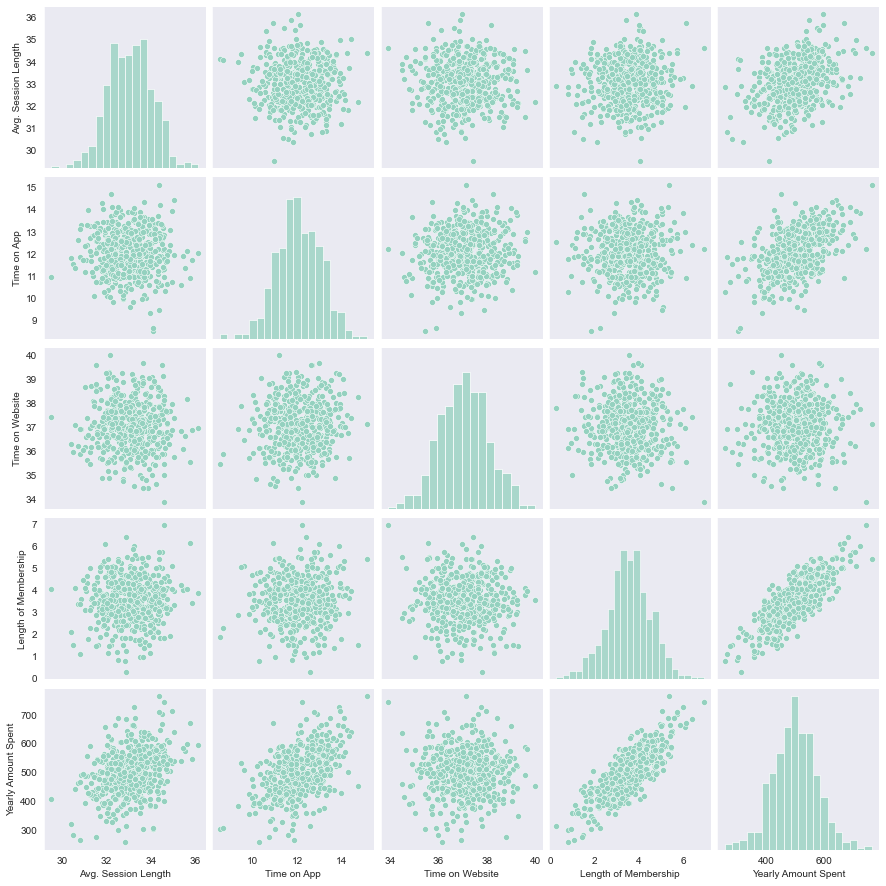

In [19]:
# Explore all data 
sns.pairplot(data);

**It seems that the most correlated features are Yearly Amount Spent and Length of Membership.**

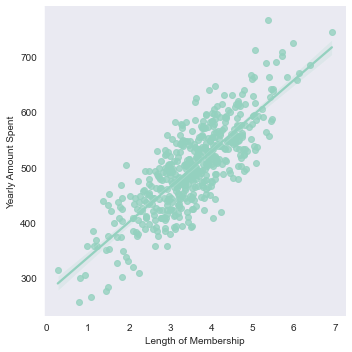

In [21]:
# Plot of Yearly Amount Spent vs. Length of Membership
sns.lmplot (x = 'Length of Membership', y = 'Yearly Amount Spent', data = data);

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [22]:
y = data['Yearly Amount Spent']
x = data [['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Training the Model

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(x_train,y_train)

LinearRegression()

In [32]:
# coefficients
lm.coef_

array([26.18453488, 38.73621473,  0.68409335, 61.2155602 ])

## Predicting Test Data

In [33]:
predictions = lm.predict(x_test)

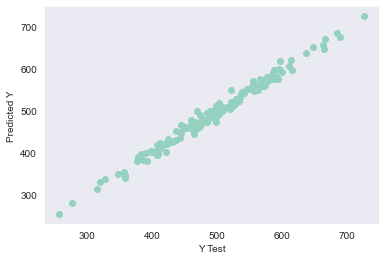

In [34]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y');

## Evaluating the Model

In [35]:
# calculate metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.747312915198724
MSE: 94.92834034723889
RMSE: 9.743117588700184


## Residuals


C:\Users\juhyu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


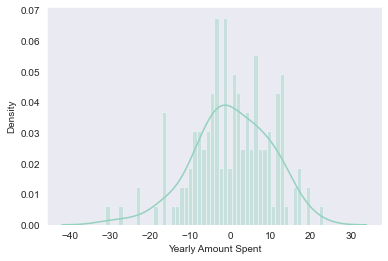

In [37]:
# Distribution of residuals
sns.distplot((y_test-predictions),bins=50);

## Conclusion

In [40]:
# Creating Dataframe of the Coefficients
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,26.184535
Time on App,38.736215
Time on Website,0.684093
Length of Membership,61.215560


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**

Develop the website to catch up to the performance of the mobile app AND develop the mobile app further because we know and we see that it works very well. The performance of the website is significantly lower than the performance of the app and I think there is plenty of room for the website to be improved.